In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading DataSet

In [61]:
df = pd.read_csv(r'C:\Users\97252\Desktop\studies\Programming\Python\Machine Learning\Social_Network_Ads.csv')

# Initial Analysis

In [62]:
print('Rows & Columns:',df.shape)
print('Variables:',list(df.columns))
print('Conversion Rate:')
print(df['Purchased'].value_counts(normalize=True))

Rows & Columns: (400, 3)
Variables: ['Age', 'EstimatedSalary', 'Purchased']
Conversion Rate:
0    0.6425
1    0.3575
Name: Purchased, dtype: float64


## Converted & Non-Converted Characteristics

In [63]:
print('Salary:')
print(df.groupby('Purchased').agg({'EstimatedSalary': ['min','max','mean','median']}))
print('Age:')
print(df.groupby('Purchased').agg({'Age': ['min','max','mean','median']}))

Salary:
          EstimatedSalary                             
                      min     max          mean median
Purchased                                             
0                   15000  141000  60544.747082  61000
1                   20000  150000  86272.727273  90000
Age:
          Age                      
          min max       mean median
Purchased                          
0          18  59  32.793774     34
1          27  60  46.391608     47


Main conclustions: statistically, people who purchased are older and earning higher salaries than the people who didn't  purchase.

# Data preprocessing

## Splitting the data into Train & Test

In [64]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1].values
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## Feature Scaling

In [65]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Testing & Comparing Different Classifiers

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
classifiers = []
results = []


## Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression 

# Training
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Testing 
y_pred = clf.predict(X_test)

ac = accuracy_score(y_test,y_pred)
print('Accuracy:',ac)
classifiers.append('L_regression')
results.append(ac)


Accuracy: 0.86


## K-Nearest neighbor

In [68]:
from sklearn.neighbors import KNeighborsClassifier

# Training
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf.fit(X_train, y_train)

# Testing 
y_pred = clf.predict(X_test)

ac = accuracy_score(y_test,y_pred)
print('Accuracy:',ac)
classifiers.append('K-Nearest')
results.append(ac)


Accuracy: 0.9


Visualization:

C:\Users\97252\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'cnap'
  import sys
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


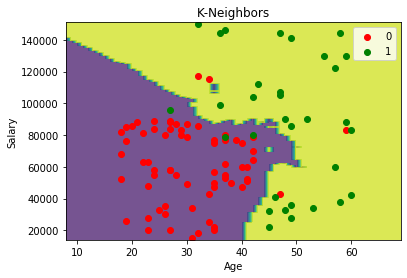

In [52]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:,0].max() + 10, step = 1),
                    np.arange(start= X_set[:,1].min() - 1000, stop = X_set[:,1].max() + 1000, step = 1))

plt.contourf(X1,X2, clf.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
            alpha = 0.75, cnap = ListedColormap(('red','green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i), label = j)
    
plt.title('K-Neighbors')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Naive Bayes

In [69]:
from sklearn.naive_bayes import GaussianNB

# Training
clf = GaussianNB()
clf.fit(X_train, y_train)

# Testing 
y_pred = clf.predict(X_test)

ac = accuracy_score(y_test,y_pred)
print('Accuracy:',ac)
classifiers.append('Bayes')
results.append(ac)


Accuracy: 0.89


## Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

# Training
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train, y_train)

# Testing 
y_pred = clf.predict(X_test)

ac = accuracy_score(y_test,y_pred)
print('Accuracy:',ac)
classifiers.append('Decision Tree')
results.append(ac)

Accuracy: 0.84


## Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

# Training
clf = RandomForestClassifier(n_estimators=10, criterion='entropy')
clf.fit(X_train, y_train)

# Testing 
y_pred = clf.predict(X_test)

ac = accuracy_score(y_test,y_pred)
print('Accuracy:',ac)
classifiers.append('Random Forest')
results.append(ac)

Accuracy: 0.91


Visualization:

C:\Users\97252\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'cnap'
  import sys
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


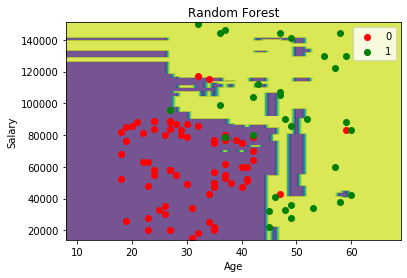

In [58]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:,0].max() + 10, step = 1),
                    np.arange(start= X_set[:,1].min() - 1000, stop = X_set[:,1].max() + 1000, step = 1))

plt.contourf(X1,X2, clf.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
            alpha = 0.75, cnap = ListedColormap(('red','green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i), label = j)
    
plt.title('Random Forest')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [83]:
summary = pd.DataFrame({'Classifiers': classifiers, 'Accuracy': results})
summary.sort_values('Accuracy', ascending = False)

,Classifiers,Accuracy
4,Random Forest,0.91
1,K-Nearest,0.90
2,Bayes,0.89
0,L_regression,0.86
3,Decision Tree,0.84
